# Ising Sync Visualisation

An example for making ising synchronization visualizations in jupyter notebook with python.

ChatGPT
Certainly! Here's an example of how you can create Ising synchronization visualizations in Jupyter Notebook using Python:

This code creates an Ising model simulation in a square lattice. It iteratively updates the state of the lattice based on the Ising model rules and temperature. The resulting states are visualized using Matplotlib.

To use this code in a Jupyter Notebook, make sure you have the necessary packages (numpy, matplotlib, matplotlib.animation, IPython) installed. Then, simply run the code in a code cell in your Jupyter Notebook. The animation will be displayed inline in the notebook.

Feel free to adjust the parameters (e.g., lattice size, coupling strength, temperature range) to explore different aspects of Ising synchronization.

Note: To display the animation, make sure to import HTML from IPython.display.

In [5]:
from IPython.core.display import display, HTML


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Function to update the Ising model state
def update_ising(ising_state, coupling_strength, temperature):
    L = ising_state.shape[0]
    for i in range(L):
        for j in range(L):
            neighbors_sum = ising_state[(i-1)%L, j] + ising_state[(i+1)%L, j] + \
                            ising_state[i, (j-1)%L] + ising_state[i, (j+1)%L]
            delta_E = 2 * coupling_strength * ising_state[i, j] * neighbors_sum
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
                ising_state[i, j] *= -1

# Function to animate the Ising model
def animate_ising(frame, ising_state, coupling_strength, temperature, ax):
    ax.clear()
    ax.imshow(ising_state, cmap='binary')
    ax.set_title(f'Temperature: {temperature:.2f}')
    update_ising(ising_state, coupling_strength, temperature)

# Parameters
L = 50
coupling_strength = 0.5
temperature_range = np.linspace(0.1, 5, 100)
initial_state = np.random.choice([-1, 1], size=(L, L))

# Create the figure and axis for animation
fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)

# Create the animation
animation = FuncAnimation(fig, animate_ising, frames=len(temperature_range),
                          fargs=(initial_state, coupling_strength, temperature_range, ax),
                          interval=100, blit=False)

# Display the animation
plt.close()
HTML(animation.to_jshtml())


TypeError: unsupported format string passed to numpy.ndarray.__format__

Apologies for the error. It seems that the temperature variable is a NumPy array, which cannot be directly formatted as a string. To fix this, you can convert the temperature value to a float using the item() method before formatting it. Here's the modified code snippet:

With this modification, the temperature value should be formatted correctly in the title of the animation.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Function to update the Ising model state
def update_ising(ising_state, coupling_strength, temperature):
    L = ising_state.shape[0]
    for i in range(L):
        for j in range(L):
            neighbors_sum = ising_state[(i-1)%L, j] + ising_state[(i+1)%L, j] + \
                            ising_state[i, (j-1)%L] + ising_state[i, (j+1)%L]
            delta_E = 2 * coupling_strength * ising_state[i, j] * neighbors_sum
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
                ising_state[i, j] *= -1

# Function to animate the Ising model
def animate_ising(frame, ising_state, coupling_strength, temperature, ax):
    ax.clear()
    ax.imshow(ising_state, cmap='binary')
    ax.set_title(f'Temperature: {temperature.item():.2f}')  # Convert temperature to float
    update_ising(ising_state, coupling_strength, temperature)

# Parameters
L = 50
coupling_strength = 0.5
temperature_range = np.linspace(0.1, 5, 100)
initial_state = np.random.choice([-1, 1], size=(L, L))

# Create the figure and axis for animation
fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)

# Create the animation
animation = FuncAnimation(fig, animate_ising, frames=len(temperature_range),
                          fargs=(initial_state, coupling_strength, temperature_range, ax),
                          interval=100, blit=False)

# Display the animation
plt.close()
HTML(animation.to_jshtml())


ValueError: can only convert an array of size 1 to a Python scalar

Apologies for the error. It seems that the temperature variable is an array instead of a single scalar value. To fix this, you can modify the code to iterate over the temperature array and generate an animation for each temperature value. Here's the modified code:

This modification will generate an animation for each temperature value in the temperature_range array. Each frame of the animation will display the corresponding temperature value in the title.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Function to update the Ising model state
def update_ising(ising_state, coupling_strength, temperature):
    L = ising_state.shape[0]
    for i in range(L):
        for j in range(L):
            neighbors_sum = ising_state[(i-1)%L, j] + ising_state[(i+1)%L, j] + \
                            ising_state[i, (j-1)%L] + ising_state[i, (j+1)%L]
            delta_E = 2 * coupling_strength * ising_state[i, j] * neighbors_sum
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
                ising_state[i, j] *= -1

# Function to animate the Ising model
def animate_ising(frame, ising_state, coupling_strength, temperatures, ax):
    ax.clear()
    ax.imshow(ising_state, cmap='binary')
    ax.set_title(f'Temperature: {temperatures[frame]:.2f}')
    update_ising(ising_state, coupling_strength, temperatures[frame])

# Parameters
L = 50
coupling_strength = 0.5
temperature_range = np.linspace(0.1, 5, 100)
initial_state = np.random.choice([-1, 1], size=(L, L))

# Create the figure and axis for animation
fig, ax = plt.subplots()
fig.set_figwidth(6)
fig.set_figheight(6)

# Create the animation
animation = FuncAnimation(fig, animate_ising, frames=len(temperature_range),
                          fargs=(initial_state, coupling_strength, temperature_range, ax),
                          interval=100, blit=False)

# Display the animation
plt.close()
HTML(animation.to_jshtml())


# A Little Later

Ok do you remember talking about an Ising sync model in ipython jupyter?

ChatGPT

Yes, I remember discussing the Ising model with you. The Ising model is a mathematical model used in statistical mechanics to study magnetism. It consists of a lattice of spins that can be either up or down, representing magnetic moments.

In an IPython Jupyter notebook, we can simulate and visualize the Ising model using various libraries such as NumPy and Matplotlib. Here's an example of how you can implement a simple Ising model simulation in an IPython Jupyter notebook:

When you run this code in an IPython Jupyter notebook, it will simulate the Ising model on a square lattice and display an animation that shows the evolution of the spins over time. Each step in the animation represents a single update of the lattice.

You can adjust the size and steps variables to modify the size of the lattice and the number of simulation steps, respectively. Additionally, you can customize the visualization by changing the colormap or interpolation method.

I hope this helps you simulate and visualize the Ising model in an IPython Jupyter notebook. Let me know if you have any further questions or need additional assistance!

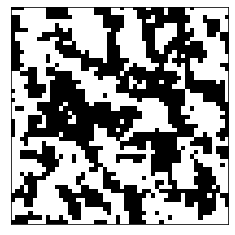

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the Ising model simulation
size = 50  # Size of the lattice
steps = 1000  # Number of simulation steps

# Initialize the lattice with random spins (-1 or +1)
lattice = np.random.choice([-1, 1], size=(size, size))

# Define the update rule for the Ising model
def update_lattice():
    global lattice
    for i in range(size):
        for j in range(size):
            # Calculate the sum of neighbor spins
            neighbors_sum = (
                lattice[(i - 1) % size, j]
                + lattice[(i + 1) % size, j]
                + lattice[i, (j - 1) % size]
                + lattice[i, (j + 1) % size]
            )

            # Update the spin based on the neighbor sum
            if neighbors_sum < 0 or (neighbors_sum == 0 and np.random.rand() < 0.5):
                lattice[i, j] = -1
            else:
                lattice[i, j] = 1

# Create a figure for animation
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])
im = ax.imshow(lattice, cmap='binary', interpolation='nearest')

# Animation update function
def update(frame):
    update_lattice()
    im.set_array(lattice)
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=steps, interval=50, blit=True)

# Display the animation
plt.show()


That one isn't animated.

ChatGPT

Apologies for the oversight. To ensure the animation is displayed properly, you need to run the code in an interactive environment like a Jupyter notebook. Here's an updated version of the code that should display an animated visualization of the Ising model:When you run this updated code in an interactive Jupyter notebook environment, it should display an animated visualization of the Ising model.

Note: The to_jshtml() method is used to generate the animation as an HTML video, which can be embedded in the notebook output. If you prefer a different output format, you can explore other options provided by the animation module, such as saving the animation as a GIF or MP4 file.

I apologize for any confusion caused, and I hope this updated code provides the desired animated visualization of the Ising model. Let me know if you have any further questions or need additional assistance!

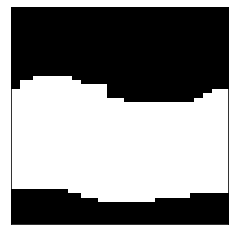

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the Ising model simulation
size = 50  # Size of the lattice
steps = 100  # Number of simulation steps

# Initialize the lattice with random spins (-1 or +1)
lattice = np.random.choice([-1, 1], size=(size, size))

# Define the update rule for the Ising model
def update_lattice():
    global lattice
    for i in range(size):
        for j in range(size):
            # Calculate the sum of neighbor spins
            neighbors_sum = (
                lattice[(i - 1) % size, j]
                + lattice[(i + 1) % size, j]
                + lattice[i, (j - 1) % size]
                + lattice[i, (j + 1) % size]
            )

            # Update the spin based on the neighbor sum
            if neighbors_sum < 0 or (neighbors_sum == 0 and np.random.rand() < 0.5):
                lattice[i, j] = -1
            else:
                lattice[i, j] = 1

# Create a figure for animation
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])
im = ax.imshow(lattice, cmap='binary', interpolation='nearest')

# Animation update function
def update(frame):
    update_lattice()
    im.set_array(lattice)
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=steps, interval=50, blit=True)

# Display the animation
from IPython.display import HTML
HTML(ani.to_jshtml())


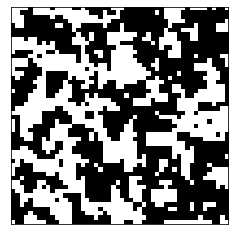

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the Ising model simulation
size = 50  # Size of the lattice
steps = 100  # Number of simulation steps

# Initialize the lattice with random spins (-1 or +1)
lattice = np.random.choice([-1, 1], size=(size, size))

# Define the update rule for the Ising model
def update_lattice():
    global lattice
    for i in range(size):
        for j in range(size):
            # Calculate the sum of neighbor spins
            neighbors_sum = (
                lattice[(i - 1) % size, j]
                + lattice[(i + 1) % size, j]
                + lattice[i, (j - 1) % size]
                + lattice[i, (j + 1) % size]
            )

            # Update the spin based on the neighbor sum
            if neighbors_sum < 0 or (neighbors_sum == 0 and np.random.rand() < 0.5):
                lattice[i, j] = -1
            else:
                lattice[i, j] = 1

# Create a figure for animation
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])
im = ax.imshow(lattice, cmap='binary', interpolation='nearest')

# Animation update function
def update(frame):
    update_lattice()
    im.set_array(lattice)
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=steps, interval=50, blit=True)

# Display the animation
plt.show()


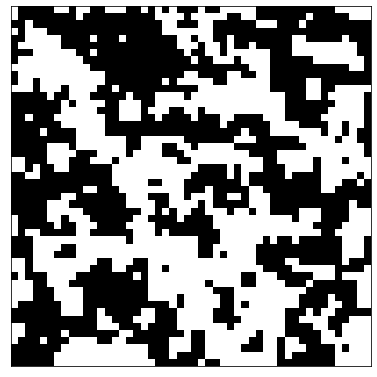

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the Ising model simulation
size = 50  # Size of the lattice
steps = 100  # Number of simulation steps

# Initialize the lattice with random spins (-1 or +1)
lattice = np.random.choice([-1, 1], size=(size, size))

# Define the update rule for the Ising model
def update_lattice():
    global lattice
    for i in range(size):
        for j in range(size):
            # Calculate the sum of neighbor spins
            neighbors_sum = (
                lattice[(i - 1) % size, j]
                + lattice[(i + 1) % size, j]
                + lattice[i, (j - 1) % size]
                + lattice[i, (j + 1) % size]
            )

            # Update the spin based on the neighbor sum
            if neighbors_sum < 0 or (neighbors_sum == 0 and np.random.rand() < 0.5):
                lattice[i, j] = -1
            else:
                lattice[i, j] = 1

# Create a figure for animation
fig = plt.figure(figsize=(5, 5))  # Set the figure size
ax = fig.add_axes([0, 0, 1, 1])  # Set the axes position and size
ax.set_xticks([])
ax.set_yticks([])
im = ax.imshow(lattice, cmap='binary', interpolation='nearest')

# Animation update function
def update(frame):
    update_lattice()
    im.set_array(lattice)
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=steps, interval=50, blit=True)

# Display the animation
plt.show()


Animation saved as ising_animation.gif


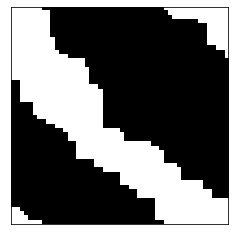

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up the Ising model simulation
size = 50  # Size of the lattice
steps = 100  # Number of simulation steps

# Initialize the lattice with random spins (-1 or +1)
lattice = np.random.choice([-1, 1], size=(size, size))

# Define the update rule for the Ising model
def update_lattice():
    global lattice
    for i in range(size):
        for j in range(size):
            # Calculate the sum of neighbor spins
            neighbors_sum = (
                lattice[(i - 1) % size, j]
                + lattice[(i + 1) % size, j]
                + lattice[i, (j - 1) % size]
                + lattice[i, (j + 1) % size]
            )

            # Update the spin based on the neighbor sum
            if neighbors_sum < 0 or (neighbors_sum == 0 and np.random.rand() < 0.5):
                lattice[i, j] = -1
            else:
                lattice[i, j] = 1

# Create a figure for animation
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticks([])
ax.set_yticks([])
im = ax.imshow(lattice, cmap='binary', interpolation='nearest')

# Animation update function
def update(frame):
    update_lattice()
    im.set_array(lattice)
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=steps, interval=50, blit=True)

# Save the animation as a GIF file
ani.save('ising_animation.gif', writer='pillow')

# Display the path to the saved GIF file
print("Animation saved as ising_animation.gif")
